In [1]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d

In [57]:
sub = {}
for idx in tqdm(np.arange(400+1)):
    try:
        sub[idx] = arepo.Subfind('lvl5/output/', idx)
    except:
        print('last snap loaded is', idx-1)
        break

 27%|██▋       | 107/401 [00:04<00:12, 22.70it/s]

last snap loaded is 106


In [60]:
Time = []
orbit = []
for idx in sub.keys():
    if len(sub[idx].SubhaloPos) > 1:
        rdiff = sub[idx].SubhaloPos[1] - sub[idx].SubhaloPos[0]
    else:
        rdiff = np.array([0., 0., 0.])
    
    orbit.append(rdiff)
    Time.append(sub[idx].Time)

orbit = np.array(orbit)
rorb = np.linalg.norm(orbit, axis=1)
Time = np.array(Time)

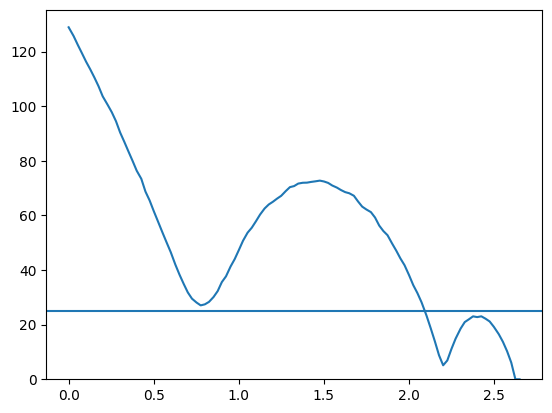

In [61]:
plt.plot(Time, rorb)
plt.ylim(0, None)
plt.axhline(25)

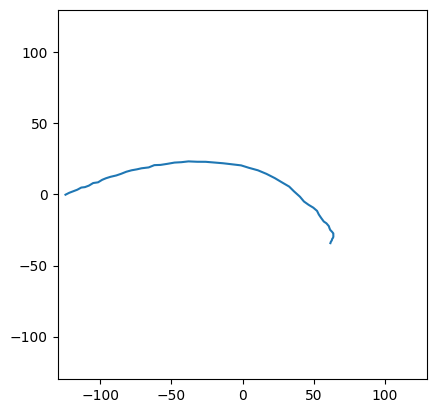

In [41]:
plt.plot(orbit[:,0], orbit[:,1])

plt.xlim(-130, 130)
plt.ylim(-130, 130)

plt.gca().set_aspect('equal')

In [42]:
vel = sub[0].SubhaloVel[1] - sub[0].SubhaloVel[0]
pos = sub[0].SubhaloPos[1] - sub[0].SubhaloPos[0]
np.cross(pos, vel)

array([-1419.998, -5520.333, -5318.597], dtype=float32)

In [49]:
sn = arepo.Snapshot('lvl5/output', 92)